In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/pneumonia/pneumonia_lungXray.zip'

Streaming output truncated to the last 5000 lines.
  inflating: pneumonia_lungXray/train/NORMAL/IM-0317-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0318-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0319-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0320-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0323-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0326-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0327-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0330-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0331-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0337-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0338-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0339-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0340-0001.jpeg  
  inflating: pneumonia_lungXray/train/NORMAL/IM-0347-0001.jpeg  
  inflating: pneumonia_lungXray/train/N

In [ ]:
base_model = InceptionV3(input_shape = (150,150,3), include_top=False, weights='imagenet')

for layer in base_model.layers:
	layer.trainable=False
	
base_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [ ]:
last_layer = base_model.get_layer('mixed7')
last_output = last_layer.output
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 7, 7, 768)


In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)           

pneumoniaModel = Model(base_model.input, x)

pneumoniaModel.compile (optimizer = 'rmsprop', loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
train = '/content/pneumonia_lungXray/train'
validation = '/content/pneumonia_lungXray/val'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory (train, batch_size=64, class_mode='binary', target_size=(150,150))
validation_generator =  validation_datagen.flow_from_directory (validation, batch_size=64, class_mode='binary', target_size=(150,150))

Found 4350 images belonging to 2 classes.
Found 689 images belonging to 2 classes.


In [ ]:
history = pneumoniaModel.fit(
    train_generator,
    steps_per_epoch=68,
    epochs=35,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=11)

Epoch 1/35
68/68 [==============================] - 230s 3s/step - loss: 0.4579 - accuracy: 0.8883 - val_loss: 0.5113 - val_accuracy: 0.8984
Epoch 2/35
68/68 [==============================] - 229s 3s/step - loss: 0.4275 - accuracy: 0.9467 - val_loss: 0.4882 - val_accuracy: 0.9013
Epoch 3/35
68/68 [==============================] - 226s 3s/step - loss: 0.4254 - accuracy: 0.9540 - val_loss: 0.5691 - val_accuracy: 0.8070
Epoch 4/35
68/68 [==============================] - 226s 3s/step - loss: 0.4178 - accuracy: 0.9653 - val_loss: 0.4901 - val_accuracy: 0.9332
Epoch 5/35
68/68 [==============================] - 226s 3s/step - loss: 0.4187 - accuracy: 0.9621 - val_loss: 0.4877 - val_accuracy: 0.9390
Epoch 6/35
68/68 [==============================] - 223s 3s/step - loss: 0.4169 - accuracy: 0.9683 - val_loss: 0.4795 - val_accuracy: 0.9521
Epoch 7/35
68/68 [==============================] - 225s 3s/step - loss: 0.4135 - accuracy: 0.9756 - val_loss: 0.5198 - val_accuracy: 0.8868
Epoch 8/35
68

In [ ]:
history = pneumoniaModel.fit(
    train_generator,
    steps_per_epoch=68,
    epochs=1,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=11)

68/68 [==============================] - 226s 3s/step - loss: 0.4046 - accuracy: 0.9938 - val_loss: 0.4925 - val_accuracy: 0.9289


In [ ]:
pneumoniaModel.save('/content/pneumonia(150x150)2.h5')

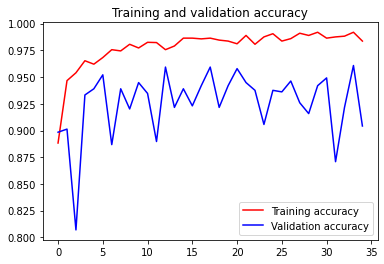

<Figure size 432x288 with 0 Axes>

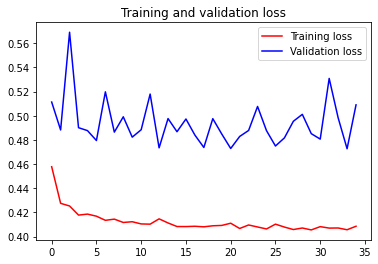

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
test = '/content/pneumonia_lungXray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test, batch_size=64, class_mode='binary', target_size=(150,150))

Found 777 images belonging to 2 classes.


In [ ]:
pneumoniaModel.evaluate(test_generator, steps=13)

13/13 [==============================] - 30s 2s/step - loss: 0.5552 - accuracy: 0.8520


[0.5552191138267517, 0.8519948720932007]